In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.layers import Dense
# import keras_tuner as kt
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from scikeras.wrappers import KerasClassifier

### Load the Dataset, visualize the data, and describe the data

In [3]:
# load the dataset
path = 'fashion-mnist_train.csv'
train_df = read_csv(path)
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
path = 'fashion-mnist_test.csv'
test_df = read_csv(path)
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Cleaning

In [5]:
# remove empty cells in training set
train_df.dropna(inplace = True)
# remove empty cells in testing set
test_df.dropna(inplace = True)

In [6]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# remove duplicates in training set
train_df.drop_duplicates(inplace = True)
test_df.drop_duplicates(inplace = True)

In [9]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
print(len(train_df['label'].unique()))
print(len(test_df['label'].unique()))
print(train_df.values[:, 1:][1])
print(len(train_df.values[:, 1:][1]))
print(len(train_df['label'].values))

10
10
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1   1   0   0   0   0  81  21   0   1
   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0  14 200  49   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   1   1   1   0   1   0   0   0 162 184 165
  20   0   1   1   3   4   1   0   0   0   0   0   0   0   0   0   0   0
   0   1   2   0   2   0 120 183 154 206  32 

### data description
The dataset consists of  a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

### get training feature, testing features, training lables, testing labels

In [13]:
X_train, y_train = train_df.values[:, 1:],train_df['label'].values
X_test, y_test = test_df.values[:, 1:],test_df['label'].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train[1])
print(y_train[1])
print(X_test[1])
print(y_test[1])
# X = X.astype('float64') # ensure all data are floating point values

(59957, 784)
(59957,)
(9999, 784)
(9999,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1   1   0   0   0   0  81  21   0   1
   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0  14 200  49   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   1   1   1   0   1   0   0   0 162 184 165
  20   0   1   1   3   4   1   0   0   0   0   0   0   0   0   0   0   0
   0   1 

In [14]:
print(X_test[0][774])

103


### Normalization

In [15]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
print(X_test[0][775])

0.3411764705882353


### Draw some of the images

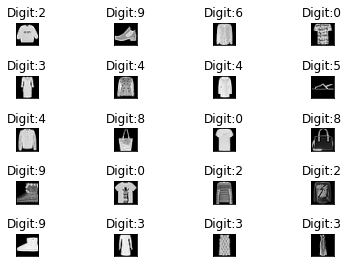

In [17]:
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title('Digit:{}'.format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

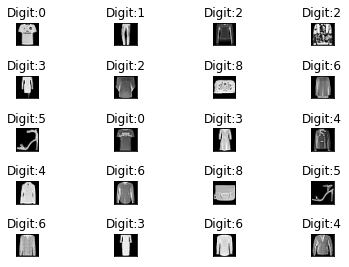

In [18]:
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.tight_layout()
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title('Digit:{}'.format(y_test[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

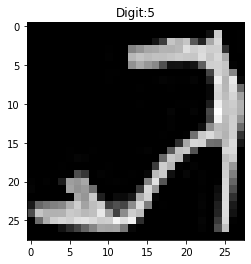

In [19]:
plt.imshow(X_test[8].reshape(28, 28), cmap='gray')
plt.title('Digit:{}'.format(y_test[8]))
plt.show()

In [20]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'))

In [21]:
# # determine the number of input features
# n_features = X_train.shape[1] # X_train.shape[0] is no. of training samples, and X_train.shape[1] is no. of features in training sample
# # n_classes = len(np.unique(df['species'].values))
# # print(n_features, n_classes)
# n_features

### correlation analysis

In [22]:
train_analysis = train_df.corr()
print(train_analysis)

             label    pixel1    pixel2    pixel3    pixel4    pixel5  \
label     1.000000 -0.000676  0.002942 -0.010453 -0.007119 -0.004629   
pixel1   -0.000676  1.000000  0.297899  0.067551  0.046607  0.026630   
pixel2    0.002942  0.297899  1.000000  0.575033  0.138709  0.054353   
pixel3   -0.010453  0.067551  0.575033  1.000000  0.387468  0.118136   
pixel4   -0.007119  0.046607  0.138709  0.387468  1.000000  0.573172   
...            ...       ...       ...       ...       ...       ...   
pixel780 -0.066846 -0.002442 -0.002341 -0.001494  0.010101  0.021514   
pixel781 -0.018054 -0.000109  0.004271  0.006861  0.023940  0.025971   
pixel782  0.045588  0.008764  0.014215  0.013151  0.012388  0.028859   
pixel783  0.059963  0.026388  0.021296  0.009946  0.003072  0.022939   
pixel784  0.021773  0.041581  0.022161  0.015657  0.008422  0.007124   

            pixel6    pixel7    pixel8    pixel9  ...  pixel775  pixel776  \
label    -0.011058 -0.036828 -0.085385 -0.161761  ... -0.3

In [23]:
print(test_df.corr())

             label    pixel1    pixel2    pixel3    pixel4    pixel5  \
label     1.000000  0.002841 -0.003617 -0.003109 -0.009322 -0.007137   
pixel1    0.002841  1.000000  0.046329  0.006207  0.006825  0.002768   
pixel2   -0.003617  0.046329  1.000000  0.978786  0.740031  0.391098   
pixel3   -0.003109  0.006207  0.978786  1.000000  0.741953  0.365044   
pixel4   -0.009322  0.006825  0.740031  0.741953  1.000000  0.683970   
...            ...       ...       ...       ...       ...       ...   
pixel780 -0.072360  0.012562  0.026270  0.029892  0.008501 -0.002638   
pixel781 -0.021238  0.019814  0.046270  0.051873  0.015893  0.001018   
pixel782  0.037482  0.024084  0.099349  0.104852  0.040821  0.018157   
pixel783  0.056823  0.009018  0.041088  0.041215  0.006930  0.002094   
pixel784  0.028712 -0.000554 -0.000665  0.000286 -0.001183 -0.001394   

            pixel6    pixel7    pixel8    pixel9  ...  pixel775  pixel776  \
label    -0.005179 -0.038050 -0.088439 -0.154437  ... -0.3

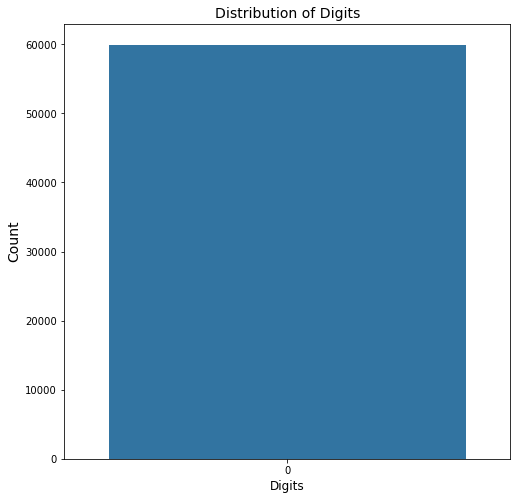

In [24]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

**train data is balanced**

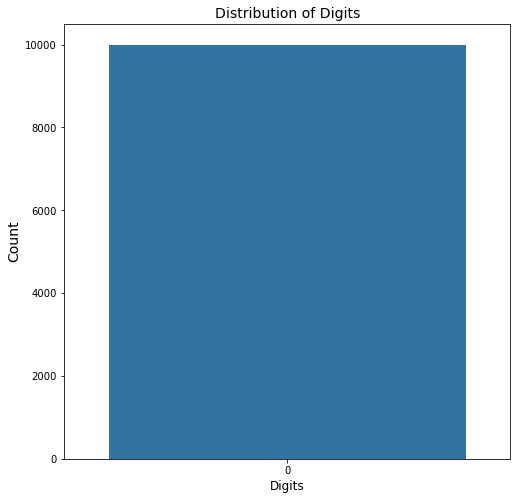

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y_test)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

**test data is balanced**

### Encode labels

In [26]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values
y_train[0], y_test[0]

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8))

In [27]:
x_train, xval, Y_train, yval = train_test_split(X_train, y_train, test_size=0.2,train_size=0.8 , shuffle = True , random_state=42)

In [28]:
x_train.shape, Y_train.shape, xval.shape, yval.shape, X_test.shape, y_test.shape

((47965, 784), (47965, 10), (11992, 784), (11992, 10), (9999, 784), (9999, 10))

### Reshaping data

In [29]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [30]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
xval = xval.reshape(xval.shape[0], 28, 28, 1)

In [31]:
x_train[0].shape

(28, 28, 1)

In [32]:
xval[0].shape

(28, 28, 1)

In [33]:
backup_X_train = X_train
backup_y_train = y_train

In [34]:
backup_X_train.shape, backup_y_train.shape

((59957, 28, 28, 1), (59957, 10))

### Grid Search

#### tunning

In [35]:
def cnn_model(optimizer='adam', activation='tanh'):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), activation=activation, padding ='same', input_shape=(28, 28, 1)))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5,5), activation=activation))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=120, kernel_size=(5,5), activation=activation))
    model.add(Flatten())
    model.add(Dense(84, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return model

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = KerasClassifier(model=cnn_model, verbose=1)
# define the grid search parameters
batch_size = [500, 2024, 3024]
epochs = [5, 10, 30]
optimizer = ['SGD', 'Adam', 'RMSprop']
learn_rate = [0.01, 0.001, 0.0001]
momentum = [0.0]
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum, optimizer=optimizer, batch_size=batch_size, epochs=epochs, model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#set early stopping criteria
early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1)
grid_result = grid.fit(xval, yval, verbose = 1, callbacks=[early_stopping])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/30
24/24 [==============================] - 5s 155ms/step - loss: 1.4768 - accuracy: 0.5040
Epoch 2/30
24/24 [==============================] - 4s 154ms/step - loss: 0.8409 - accuracy: 0.6888
Epoch 3/30
24/24 [==============================] - 4s 155ms/step - loss: 0.7059 - accuracy: 0.7397
Epoch 4/30
24/24 [==============================] - 4s 155ms/step - loss: 0.6543 - accuracy: 0.7563
Epoch 5/30
24/24 [==============================] - 4s 164ms/step - loss: 0.6202 - accuracy: 0.7726
Epoch 6/30
24/24 [==============================] - 4s 162ms/step - loss: 0.5871 - accuracy: 0.7853
Epoch 7/30
24/24 [==============================] - 4s 155ms/step - loss: 0.5649 - accuracy: 0.7927
Epoch 8/30
24/24 [==============================] - 4s 155ms/step - loss: 0.5443 - accuracy: 0.8014
Epoch 9/30
24/24 [==============================] - 4s 155ms/step - loss: 0.5267 - accuracy: 0.8078
Epoch 10/30
24/24 [==============================] - 4s 154ms/step - loss: 0.5097 - accuracy: 0.8141

#### training

In [37]:
# best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.849482 using {'batch_size': 500, 'epochs': 30, 'model__activation': 'tanh', 'optimizer': 'Adam', 'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}


In [38]:
parameters = grid_result.best_params_
optimizer = parameters['optimizer']
activation = parameters['model__activation']
epochs = parameters['epochs']
batch_size = parameters['batch_size']
lr = parameters['optimizer__learning_rate']
print(activation, optimizer, int(epochs), batch_size, type(int(epochs)), lr)
if(optimizer == 'Adam'):
    optimizer = keras.optimizers.Adam(learning_rate=lr)
elif(optimizer == 'SGD'): 
    optimizer = keras.optimizers.SGD(learning_rate=lr)
else:
    optimizer = keras.optimizers.RMSprop(learning_rate=lr)
model = cnn_model(optimizer, activation)
# fit the model
#set early stopping criteria
early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1)
result = model.fit(x_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

tanh Adam 30 500 <class 'int'> 0.001
Epoch 1/30
96/96 [==============================] - 17s 163ms/step - loss: 0.8577 - accuracy: 0.7005
Epoch 2/30
96/96 [==============================] - 16s 164ms/step - loss: 0.5317 - accuracy: 0.8047
Epoch 3/30
96/96 [==============================] - 15s 161ms/step - loss: 0.4702 - accuracy: 0.8310
Epoch 4/30
96/96 [==============================] - 15s 160ms/step - loss: 0.4324 - accuracy: 0.8443
Epoch 5/30
96/96 [==============================] - 15s 161ms/step - loss: 0.4046 - accuracy: 0.8551
Epoch 6/30
96/96 [==============================] - 15s 158ms/step - loss: 0.3811 - accuracy: 0.8641
Epoch 7/30
96/96 [==============================] - 17s 176ms/step - loss: 0.3694 - accuracy: 0.8677
Epoch 8/30
96/96 [==============================] - 16s 168ms/step - loss: 0.3522 - accuracy: 0.8741
Epoch 9/30
96/96 [==============================] - 16s 168ms/step - loss: 0.3445 - accuracy: 0.8760
Epoch 10/30
96/96 [==============================] - 1

No handles with labels found to put in legend.


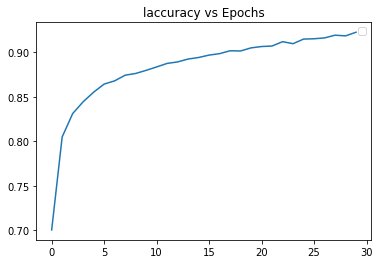

In [39]:
plt.title('laccuracy vs Epochs')
plt.plot(result.history['accuracy']) 
plt.legend()
plt.show()

#### Evaluation

In [40]:
# evaluate the model
def evaluate_model(model, X_test, y_test):
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    return loss, acc
loss, acc = evaluate_model(model, X_test, y_test)
print('Test Accuracy: %.3f' % (acc*100))
print('loss', loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.2836 - accuracy: 0.8958
Test Accuracy: 89.579
loss 0.2836412191390991


### 5-vold cross validation

In [41]:
data = train_df.values
print(data.shape)
print(data[0].shape)
print(data[0])

(59957, 785)
(785,)
[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
   0   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  88 201 228 225 255 115
  62 137 255 235 222 255 135   0   0   0   0   0   0   0   0   0   0   0
   0   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254
  45   0   0   0   0   0   0   0   0   1   0   0 214 222 210 213 224 225
 217 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0   1
   0   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219 213
 226 211 237 150   0   0   0   0   0   0   2   0   0 237 222 215 207 210
 212 213 206 214 213 214 213 21

In [42]:
from sklearn.model_selection import KFold
# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
for train, val in kfold.split(data):
    print('train: %s, val: %s' % (data[train], data[val]))
    print('train: %s, val: %s' % (data[train].shape, data[val].shape))

train: [[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]], val: [[0 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
train: (47965, 785), val: (11992, 785)
train: [[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]], val: [[6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [9 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
train: (47965, 785), val: (11992, 785)
train: [[9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]], val: [[2 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]
train: (47966, 785), val: (11991, 785)
train: [[2 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0

In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

#define a function to fit the model
def fit_and_evaluate(X_train, X_val, y_train, y_val, EPOCHS=20, BATCH_SIZE=128):
    model = None
    model = cnn_model()
    results = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.1)  
    val_loss, val_accur = model.evaluate(X_val, y_val)
    return results, val_accur

In [44]:
#save the model history in a list after fitting so that we can plot later
model_history = [] 
from sklearn.model_selection import KFold
# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
i = 0
for train, val in kfold.split(data):
    print("Training on Fold: ",i+1)
    train = data[train]
    val = data[val]
    print('train: %s, val: %s' % (train.shape, val.shape))
    X_train = train[:, 1:]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    y_train = pd.get_dummies(train[:, 0]).values
    xval = val[:, 1:]
    xval = xval.reshape(xval.shape[0], 28, 28, 1)
    yval = pd.get_dummies(val[:, 0]).values
    print(X_train.shape, y_train.shape, xval.shape, yval.shape)
#     print(X_train[0])
    print(y_train[0])
#     print(xval[0])
    print(yval[0])
    model_history.append(fit_and_evaluate(X_train, xval, y_train, yval, 10, 2024))
    print("======="*12, end="\n\n\n")
    i = i + 1
    

Training on Fold:  1
train: (47965, 785), val: (11992, 785)
(47965, 28, 28, 1) (47965, 10) (11992, 28, 28, 1) (11992, 10)
[0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 1.2579 - accuracy: 0.6112
Epoch 1: val_loss improved from inf to 0.70510, saving model to fas_mnist_1.h5
22/22 [==============================] - 14s 588ms/step - loss: 1.2579 - accuracy: 0.6112 - val_loss: 0.7051 - val_accuracy: 0.7555
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 0.6041 - accuracy: 0.7791
Epoch 2: val_loss improved from 0.70510 to 0.54763, saving model to fas_mnist_1.h5
22/22 [==============================] - 13s 594ms/step - loss: 0.6041 - accuracy: 0.7791 - val_loss: 0.5476 - val_accuracy: 0.7934
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 0.5003 - accuracy: 0.8179
Epoch 3: val_loss improved from 0.54763 to 0.48575, saving model to fas_mnist_1.h5
22/22 [==============================] - 13

#### plot the accuracies

In [52]:
h_len = len(model_history)

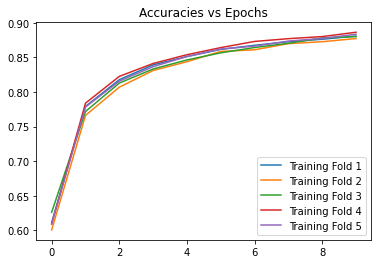

In [53]:
plt.title('Accuracies vs Epochs')
for i in range(5):
    plt.plot(model_history[i][0].history['accuracy'], label='Training Fold '+str(i+1)) 
plt.legend()
plt.show()

#### Validation accuracy vs folds

In [69]:
val_sum = 0
for i in range(h_len):
    print('the validation accuracy at Training Fold '+str(i+1)+": "+str(model_history[i][1]))
    val_sum = val_sum + model_history[i][1]
print("average validation accuracy: "+ str((val_sum/h_len)*100))


the validation accuracy at Training Fold 1: 0.8719980120658875
the validation accuracy at Training Fold 2: 0.87391597032547
the validation accuracy at Training Fold 3: 0.8787423968315125
the validation accuracy at Training Fold 4: 0.8830789923667908
the validation accuracy at Training Fold 5: 0.8739054203033447
average validation accuracy: 87.63281583786011


#### Training loss vs Epochs

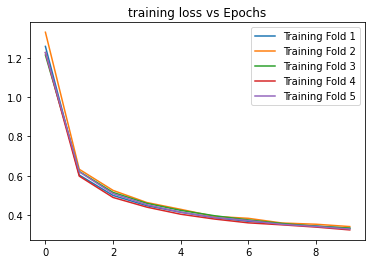

In [73]:
plt.title('training loss vs Epochs')
for i in range(5):
    plt.plot(model_history[i][0].history['loss'], label='Training Fold '+str(i+1)) 
plt.legend()
plt.show()

In [74]:
model_history

[(<keras.callbacks.History at 0x1ad349d7b08>, 0.8719980120658875),
 (<keras.callbacks.History at 0x1ad32dc45c8>, 0.87391597032547),
 (<keras.callbacks.History at 0x1ad330b59c8>, 0.8787423968315125),
 (<keras.callbacks.History at 0x1ad33387e48>, 0.8830789923667908),
 (<keras.callbacks.History at 0x1ad32ac1448>, 0.8739054203033447)]

In [75]:
max = 0
knn_model = model_history[0][0]
for i in range(h_len):
    if(model_history[i][1] > max):
        max = model_history[i][1]
        knn_model = model_history[i][0]

In [77]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2836 - accuracy: 0.8958


[0.2836412191390991, 0.8957895636558533]

In [87]:
sum = 0
for i in range(len(model_history)):
    l = len(model_history[i][0].history['accuracy'])
    sum = sum + model_history[i][0].history['accuracy'][l-1]
train_average = sum / len(model_history)
print("train_average: "+ str(train_average))

train_average: 0.8816778659820557


In [88]:
sum = 0
for i in range(len(model_history)):
    l = len(model_history[i][0].history['val_accuracy'])
    sum = sum + model_history[i][0].history['val_accuracy'][l-1]
test_average = sum / len(model_history)
print("test_average: "+ str(test_average))

test_average: 0.8725036382675171


### Transfer learning

#### Reshape data 

In [36]:
temp = backup_X_train
(num, _, _, _) = temp.shape
temp = np.repeat(temp, 3, axis=3)
train_inputs= np.zeros((num,32,32,3))
train_inputs[:,2:30,2:30,:] = temp
print(X_train.shape, temp.shape, train_inputs.shape)


(59957, 28, 28, 1) (59957, 28, 28, 3) (59957, 32, 32, 3)


In [37]:
print(train_inputs[0].shape)

(32, 32, 3)


#### use VGG16 with imagenet weights

In [38]:
from keras.applications import VGG16
#  Create base model of VGG16
vgg16_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(32, 32, 3)
                 )
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [39]:
num_layers = len(vgg16_base.layers)
# transfer model
transfer_model1 = Sequential()
# Add the vgg convolutional base model
for i in range(num_layers):
    transfer_model1.add(vgg16_base.layers[i])
# Add new layers
transfer_model1.add(Flatten())
transfer_model1.add(Dense(10, activation='softmax'))


for i in range(num_layers):
    transfer_model1.layers[i].trainable = False

transfer_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [40]:
transfer_model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [41]:
# training
transfer_model1.fit(train_inputs, backup_y_train, epochs=20, batch_size = 1024, verbose = 1)

Epoch 1/20
59/59 [==============================] - 302s 4s/step - loss: 1.7323 - accuracy: 0.5281
Epoch 2/20
59/59 [==============================] - 279s 5s/step - loss: 1.0950 - accuracy: 0.7203
Epoch 3/20
59/59 [==============================] - 278s 5s/step - loss: 0.8816 - accuracy: 0.7450
Epoch 4/20
59/59 [==============================] - 294s 5s/step - loss: 0.7818 - accuracy: 0.7589
Epoch 5/20
59/59 [==============================] - 280s 5s/step - loss: 0.7220 - accuracy: 0.7692
Epoch 6/20
59/59 [==============================] - 273s 5s/step - loss: 0.6807 - accuracy: 0.7778
Epoch 7/20
59/59 [==============================] - 268s 5s/step - loss: 0.6499 - accuracy: 0.7853
Epoch 8/20
59/59 [==============================] - 267s 5s/step - loss: 0.6258 - accuracy: 0.7910
Epoch 9/20
59/59 [==============================] - 260s 4s/step - loss: 0.6057 - accuracy: 0.7954
Epoch 10/20
59/59 [==============================] - 246s 4s/step - loss: 0.5886 - accuracy: 0.7997
Epoch 11/

In [42]:
temp = X_test
(num, _, _, _) = temp.shape
temp = np.repeat(temp, 3, axis=3)
test_inputs= np.zeros((num,32,32,3))
test_inputs[:,2:30,2:30,:] = temp
print(X_test.shape, temp.shape, test_inputs.shape)

(9999, 28, 28, 1) (9999, 28, 28, 3) (9999, 32, 32, 3)


In [44]:
#Evalution
test_loss, test_acc = transfer_model1.evaluate(test_inputs,  y_test, verbose=2)

print('\ntest_accuracy:', (test_acc*100))

313/313 - 68s - loss: 0.4868 - accuracy: 0.8268 - 68s/epoch - 216ms/step

test_accuracy: 82.67827033996582


#### use VGG19 with imagenet weights

In [45]:
from keras.applications import VGG19
# create the base pre-trained model
vgg19_model = VGG19(weights='imagenet',
                  include_top=False, 
                  input_shape=(32, 32, 3)
                 )

80134624/80134624 [==============================] - 24s 0us/step


In [46]:
num_layers = len(vgg19_model.layers)
# transfer model
transfer_model2 = Sequential()
# Add the InceptionV3 convolutional base model
for i in range(num_layers):
    transfer_model2.add(vgg19_model.layers[i])
# Add new layers
transfer_model2.add(Flatten())
transfer_model2.add(Dense(10, activation='softmax'))


for i in range(num_layers):
    transfer_model2.layers[i].trainable = False

transfer_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [47]:
transfer_model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# training
transfer_model2.fit(train_inputs, backup_y_train, epochs=20, batch_size = 1024, verbose = 1)

Epoch 1/20
59/59 [==============================] - 440s 7s/step - loss: 1.7165 - accuracy: 0.5062
Epoch 2/20
59/59 [==============================] - 389s 7s/step - loss: 1.0577 - accuracy: 0.7096
Epoch 3/20
59/59 [==============================] - 391s 7s/step - loss: 0.8614 - accuracy: 0.7437
Epoch 4/20
59/59 [==============================] - 352s 6s/step - loss: 0.7677 - accuracy: 0.7616
Epoch 5/20
59/59 [==============================] - 351s 6s/step - loss: 0.7100 - accuracy: 0.7738
Epoch 6/20
59/59 [==============================] - 355s 6s/step - loss: 0.6701 - accuracy: 0.7834
Epoch 7/20
59/59 [==============================] - 356s 6s/step - loss: 0.6397 - accuracy: 0.7902
Epoch 8/20
59/59 [==============================] - 320s 5s/step - loss: 0.6166 - accuracy: 0.7959
Epoch 9/20
59/59 [==============================] - 314s 5s/step - loss: 0.5966 - accuracy: 0.8010
Epoch 10/20
59/59 [==============================] - 335s 6s/step - loss: 0.5804 - accuracy: 0.8050
Epoch 11/

In [49]:
# Evaluation
test_loss, test_acc = transfer_model2.evaluate(test_inputs,  y_test, verbose=2)

print('\ntest_accuracy:', test_acc)

313/313 - 87s - loss: 0.4862 - accuracy: 0.8294 - 87s/epoch - 279ms/step

test_accuracy: 0.8293829560279846
